In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

time_delta = 0.05
magnitude = 6.5

LEVELS = {
    'ltl3': 'slip distribution calculators',
    'ltl5': 'slip rate calculators',
}
LABELS = {
    'ltl2': {'WC1994_m2a': 'WC1994a', 'WC1994_m2l': 'WC1994l', 'ThingbaijamEA2017_m2a_n': 'Tea2017a', 'ThingbaijamEA2017_m2l_n': 'Tea2017l'},
    'ltl5': {'LiuArchuleta2004': 'LA2004', 'LiuEtAl2006': 'Lea2006'},
}

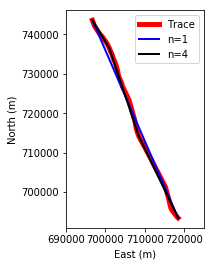

In [3]:
## Fault trace

from data import rauw_fault_surface_trace


trace1 = rauw_fault_surface_trace(proj=3812)
trace2 = trace1.get_simplified(n=1)
trace3 = trace1.get_simplified(n=4)

plt.plot(trace1.ys, trace1.xs, c='r', lw=5, ls='-', label='Trace')
plt.plot(trace2.ys, trace2.xs, c='b', lw=2, label='n=1')
plt.plot(trace3.ys, trace3.xs, c='k', lw=2, label='n=4')
plt.legend()
plt.axis('scaled')

x_label, y_label = 'East (m)', 'North (m)'
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(690000, 725000)
title = 'Fault trace'
#plt.title(title)
#plt.savefig('images/' + title + '.png', bbox_inches='tight')
plt.show()
plt.show()

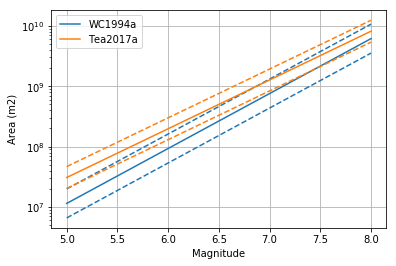

In [4]:
## Magnitude 2 area

from synthacc.source.scaling import WC1994_m2a, WC1994_m2a_n, ThingbaijamEA2017_m2a_n


scs = [WC1994_m2a(), ThingbaijamEA2017_m2a_n()]

mags = np.linspace(5, 8, 100)

for i, sc in enumerate(scs):
    avg_areas = []
    min_areas = []
    max_areas = []
    for m in mags:
        a = sc.get_mean(float(m))
        avg_areas.append(a)
        sd = sc.get_sd(m, n=1)
        min_areas.append(sd[0])
        max_areas.append(sd[1])

    plt.semilogy(mags, avg_areas, c=colors[i], label=LABELS['ltl2'][sc.__class__.__name__])
    plt.semilogy(mags, min_areas, c=colors[i], ls='--')
    plt.semilogy(mags, max_areas, c=colors[i], ls='--')

plt.grid()
plt.legend()
plt.xlabel('Magnitude')
plt.ylabel('Area (m2)')
title = 'Fault segment calculators by area'
#plt.title(title)
#plt.savefig('images/' + title + '.png', bbox_inches='tight')
plt.show()

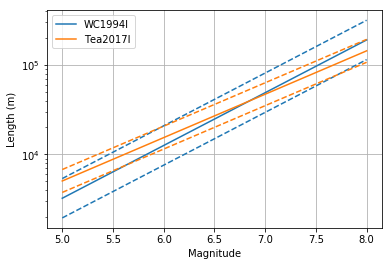

In [5]:
## Magnitude 2 length

from synthacc.source.scaling import WC1994_m2l, ThingbaijamEA2017_m2l_n


scs = [WC1994_m2l(), ThingbaijamEA2017_m2l_n()]

mags = np.linspace(5, 8, 100)

for i, sc in enumerate(scs):
    avg_lengths = []
    min_lengths = []
    max_lengths = []
    for m in mags:
        l = sc.get_mean(float(m))
        avg_lengths.append(l)
        sd = sc.get_sd(m, n=1)
        min_lengths.append(sd[0])
        max_lengths.append(sd[1])

    plt.semilogy(mags, avg_lengths, c=colors[i], label=LABELS['ltl2'][sc.__class__.__name__])
    plt.semilogy(mags, min_lengths, c=colors[i], ls='--')
    plt.semilogy(mags, max_lengths, c=colors[i], ls='--')

plt.grid()
plt.legend()
plt.xlabel('Magnitude')
plt.ylabel('Length (m)')
title = 'Fault segment calculators by length'
#plt.title(title)
#plt.savefig('images/' + title + '.png', bbox_inches='tight')
plt.show()

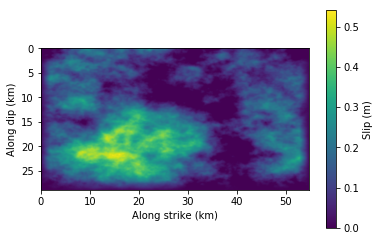

In [6]:
## Slip distribution - RF

from faults import rauw_simple_fault

from synthacc.source.rupture.slip import MaiBeroza2002RFSDC, RandomFieldSDG


segment = rauw_simple_fault()
c = MaiBeroza2002RFSDC(100, 100, 0.85)
g = RandomFieldSDG(c, segment.width, segment.length, magnitude)
title = 'RF'
filespec = 'images/' + title + '.png'
g().plot(filespec=None)

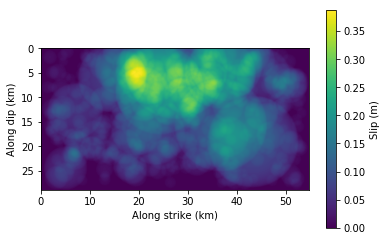

In [7]:
## Slip distribution - CS

from faults import rauw_simple_fault

from synthacc.source.rupture.slip import CompositeSourceSDC, CompositeSourceSDG


c = CompositeSourceSDC(100, rminf=10, rmaxf=0.5)
g = CompositeSourceSDG(c, segment.width, segment.length, magnitude)
title = 'CS'
filespec = 'images/' + title + '.png'
g().plot(filespec=None)

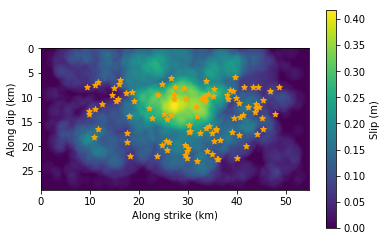

In [8]:
## Hypocenter

from faults import rauw_simple_fault

from synthacc.source.rupture.slip import CompositeSourceSDC, CompositeSourceSDG
from synthacc.source.rupture.hypo import MaiEtAl2005HCC


segment = rauw_simple_fault()

c = CompositeSourceSDC(100, rminf=10, rmaxf=0.5)
g = CompositeSourceSDG(c, segment.width, segment.length, magnitude)

sd = g()
hcc = MaiEtAl2005HCC()

hypos = [hcc(segment, sd) for i in range(100)]

fig, ax = plt.subplots()

extent = [0, segment.length/1000, segment.width/1000, 0]
p = ax.imshow(sd._values, interpolation='bicubic', extent=extent)

plt.scatter([h.y/1000 for h in hypos], [h.x/1000 for h in hypos], marker='*', color='orange')

plt.axis('scaled')
plt.xlim(0, extent[1])
plt.ylim(extent[2], 0)

xlabel, ylabel = 'Along strike (km)', 'Along dip (km)'
plt.xlabel(xlabel)
plt.ylabel(ylabel)

cbar = fig.colorbar(p)
cbar.set_label('Slip (m)')

#plt.savefig('images/' + 'hypo' + '.png', bbox_inches='tight')
plt.show()

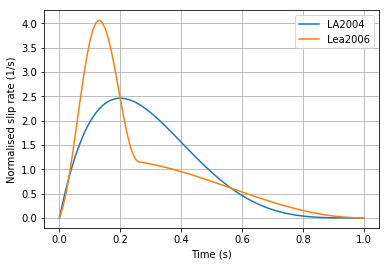

In [9]:
## Normalised Slip rate calculators

from synthacc.source.rupture.slip import LiuArchuleta2004NSRC, LiuEtAl2006NSRC


time_delta = 0.01
rise_time = 1
times = time_delta * np.arange(np.round(rise_time / time_delta) +1)

nsrf1 = LiuArchuleta2004NSRC()(time_delta, rise_time)
nsrf2 = LiuEtAl2006NSRC()(time_delta, rise_time)

plt.plot(times, nsrf1, label=LABELS['ltl5']['LiuArchuleta2004'])
plt.plot(times, nsrf2, label=LABELS['ltl5']['LiuEtAl2006'])
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Normalised slip rate (1/s)')
title = 'Slip rate calculators'
#plt.title(title)
#plt.savefig('images/' + title + '.png', bbox_inches='tight')
plt.show()

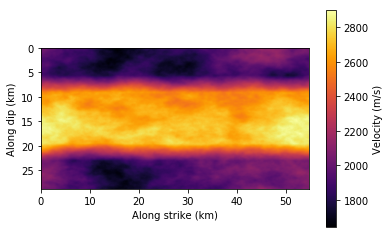

In [10]:
## Velocity

from faults import rauw_simple_fault

from synthacc.source.rupture.slip import MaiBeroza2002RFSDC, RandomFieldSDG
from synthacc.source.rupture.velocity import RandomFieldVDC, LayeredRandomFieldVDC


segment = rauw_simple_fault()
c = MaiBeroza2002RFSDC(100, 100, 0.85)
g = RandomFieldSDG(c, segment.width, segment.length, magnitude)
sd = g()
segment = segment.get_discretized(shape=sd.shape)

c = LayeredRandomFieldVDC(2700, 2700, sd=100)
vd = c(segment, magnitude, sd)
filespec = 'images/' + 'vel' + '.png',
vd.plot(cmap='inferno', filespec=None)